# Similaridade por Cosseno

Neste documento, vamos explorar o conceito de similaridade de documentos por cosseno.

In [2]:
from nltk.corpus import machado
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
import string

from collections import defaultdict
from nltk.stem.snowball import PortugueseStemmer
import nltk
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Vamos começar importando os textos de Machado de Assis

In [2]:
textos = [machado.raw(id) for id in machado.fileids()]
len(textos)

246

In [3]:
tok_textos = [WordPunctTokenizer().tokenize(t.lower()) for t in textos]

In [6]:
len(set(tok_textos[0]))

7483

Depois de tokenizar, vamos extrair o vocabulário dos textos

In [11]:
vocab = set([])
for t in tok_textos:
    vocab = vocab.union(set(t))
#vocab = list(set(vocab))
print(len(vocab))
#vocab

66169


Agora vamos criar uma coleção de textos, para poder utilizar os métods definidos para esta classe.

In [12]:
T = nltk.TextCollection(tok_textos)

In [17]:
T.idf("mão")

0.20701416938432612

Vamos agora fazer uma consulta e tokenizá-la

In [18]:
q = "Lamartine elixir harpa"
qt = WordPunctTokenizer().tokenize(q.lower())

Agora vamos calcular o tfidf dos termos da nossa consulta em cada documento.

In [20]:
tfidf_matrix = np.zeros((len(tok_textos),len(qt)))
for j,w in enumerate(qt):
    for i, d in enumerate(tok_textos):
        tfidf_matrix[i,j] = T.tf_idf(w,d)
print(tfidf_matrix.shape)
tfidf_matrix[:3,:]

(246, 3)


array([[  4.34449734e-05,   9.51658288e-05,   4.12277118e-05],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

Já vimos que a similaridade entre dois cossenos é dada por:

$$\text{similarity} = \cos(\theta) = {\mathbf{A} \cdot \mathbf{B} \over \|\mathbf{A}\| \|\mathbf{B}\|} = \frac{ \sum\limits_{i=1}^{n}{A_i  B_i} }{ \sqrt{\sum\limits_{i=1}^{n}{A_i^2}}  \sqrt{\sum\limits_{i=1}^{n}{B_i^2}} }$$

Vamos calcular a norma L2 da matriz de tf-idf:
$||A||_F = \sqrt{\sum_{i} |A_{i}|^2}$

In [21]:
from numpy.linalg import norm
MN = np.array([r/norm(r) if norm(r) !=0 else np.zeros(len(r)) for r in tfidf_matrix])
def ordem(q):
    return [np.dot(q,r) for r in MN]
# calculando o tf-idf dos termos na consulta, considerando q um documento da Coleção...
# O que equivale a vetorizar a consulta.
qv = np.array([T.tf_idf(w,qt) for w in qt])
qv /= norm(qv)
r = ordem(qv)
v=filter(lambda x : x[0]!=0.0, zip(r,range(len(tok_textos))))

resposta = sorted(v, reverse=True) 
resposta

[(0.96828908936389757, 185),
 (0.9435141616147088, 0),
 (0.78297901914356116, 4),
 (0.74416385783148287, 217),
 (0.67850278296095257, 193),
 (0.6220481135579361, 238),
 (0.6220481135579361, 229),
 (0.6220481135579361, 138),
 (0.6220481135579361, 85),
 (0.6220481135579361, 41),
 (0.6220481135579361, 32),
 (0.61750882876681013, 222),
 (0.56795310009168176, 232),
 (0.56795310009168176, 194),
 (0.56795310009168176, 176),
 (0.56795310009168176, 152),
 (0.56795310009168176, 125),
 (0.56795310009168176, 16),
 (0.53896699390153857, 240),
 (0.53896699390153857, 218),
 (0.53896699390153857, 216),
 (0.53896699390153857, 186),
 (0.53896699390153857, 184),
 (0.53896699390153857, 165),
 (0.53896699390153857, 147),
 (0.53896699390153857, 139),
 (0.53896699390153857, 80)]

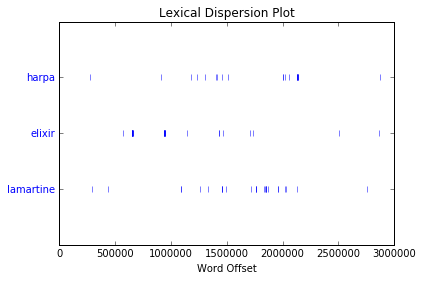

In [64]:
T.dispersion_plot(qt)

In [123]:
t185 = nltk.Text(WordPunctTokenizer().tokenize(textos[185].lower()))
t185.concordance('elixir')

Displaying 3 of 3 matches:
stas criaturas que trazem consigo o elixir de longa vida e o elixir de longa b
 consigo o elixir de longa vida e o elixir de longa beleza . aos 40 anos inspi
 e conhecimento de cena . cantou no elixir de amor . estou que os leitores ter


In [22]:
for sim,tid in resposta: 
    fd=nltk.FreqDist(WordPunctTokenizer().tokenize(textos[tid].lower()))
    print("Ocorrências dos termos de busca no texto {}: ".format(tid),fd['lamartine'],fd['elixir'],fd['harpa'])

Ocorrências dos termos de busca no texto 185:  4 3 2
Ocorrências dos termos de busca no texto 0:  1 2 1
Ocorrências dos termos de busca no texto 4:  1 0 1
Ocorrências dos termos de busca no texto 217:  2 0 1
Ocorrências dos termos de busca no texto 193:  11 2 0
Ocorrências dos termos de busca no texto 238:  0 1 0
Ocorrências dos termos de busca no texto 229:  0 1 0
Ocorrências dos termos de busca no texto 138:  0 1 0
Ocorrências dos termos de busca no texto 85:  0 9 0
Ocorrências dos termos de busca no texto 41:  0 10 0
Ocorrências dos termos de busca no texto 32:  0 1 0
Ocorrências dos termos de busca no texto 222:  1 0 7
Ocorrências dos termos de busca no texto 232:  1 0 0
Ocorrências dos termos de busca no texto 194:  1 0 0
Ocorrências dos termos de busca no texto 176:  1 0 0
Ocorrências dos termos de busca no texto 152:  1 0 0
Ocorrências dos termos de busca no texto 125:  2 0 0
Ocorrências dos termos de busca no texto 16:  1 0 0
Ocorrências dos termos de busca no texto 240:  0 0 1

In [25]:
nltk.TextCollection??

Vamos agora visualizar os vetores:

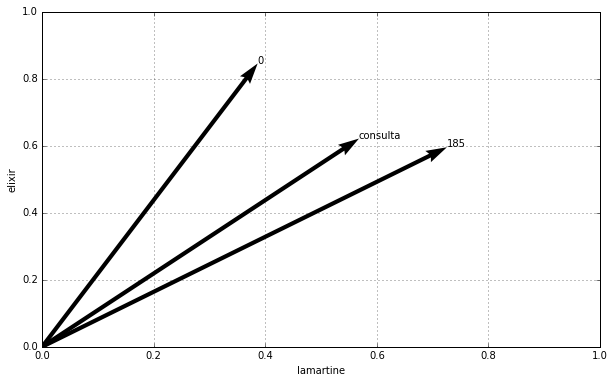

In [119]:
fig = plt.figure(figsize=(10,6))
ax = plt.gca()
docs = 2
vecs = [qv[:2]]
for d in resposta[:docs]:
    vecs.append(MN[d[1]][:2])
    x,y = MN[d[1]][:2]
    plt.text(x,y,'{}'.format(d[1]))
U, V = zip(*vecs)
x,y = zeros(docs+1), zeros(docs+1)
plt.text(U[0],V[0],'consulta')
plt.grid()
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xlabel('lamartine')
ax.set_ylabel('elixir')
ax.quiver(x,y,U,V,angles='xy',scale_units='xy', scale=1.0);

Usando o Gensim
---------------

O Gensim é uma biblioteca em Python para modelagem de assuntos. Contudo ele oferece uma série de outras ferramentas muito úteis para outros tipos de problemas em *Recuperação de informação*
https://radimrehurek.com/gensim/index.html

In [23]:
from gensim import corpora, models, similarities
from nltk.corpus import stopwords
from nltk.stem.snowball import PortugueseStemmer
from collections import Counter
from string import punctuation

In [24]:
sw = stopwords.words('portuguese')+ list(punctuation)
stemmer = PortugueseStemmer()

Como aprendemos na prática 1, vamos tokenizar, normalizar e remover *stopwords* dos textos.

In [25]:
textos_limpos = []
c = Counter([])
for texto in textos:
    tlimpo = [stemmer.stem(token.lower()) for token in WordPunctTokenizer().tokenize(texto) if token not in sw]
    c.update(tlimpo)
    textos_limpos.append(tlimpo)
textos_limpos = [[token for token in t if c[token]>1] for t in textos_limpos]

In [26]:
dicionario = corpora.Dictionary(textos_limpos)
dicionario.save('vocabulario.dict')
print(dicionario)

Dictionary(18170 unique tokens: ['louc', 'enverg', 'perus', 'sandic', 'rocambol']...)


In [28]:
dicionario.dfs

{0: 26,
 1: 76,
 2: 41,
 3: 35,
 4: 48,
 5: 87,
 6: 42,
 7: 25,
 8: 7,
 9: 7,
 10: 29,
 11: 197,
 12: 18,
 13: 2,
 14: 12,
 15: 48,
 16: 43,
 17: 52,
 18: 5,
 19: 17,
 20: 21,
 21: 139,
 22: 21,
 23: 38,
 24: 4,
 25: 12,
 26: 4,
 27: 21,
 28: 79,
 29: 242,
 30: 6,
 31: 50,
 32: 94,
 33: 77,
 34: 60,
 35: 75,
 36: 33,
 37: 97,
 38: 2,
 39: 51,
 40: 108,
 41: 73,
 42: 114,
 43: 10,
 44: 99,
 45: 56,
 46: 16,
 47: 3,
 48: 44,
 49: 109,
 50: 21,
 51: 109,
 52: 19,
 53: 94,
 54: 35,
 55: 13,
 56: 47,
 57: 41,
 58: 39,
 59: 200,
 60: 51,
 61: 28,
 62: 81,
 63: 15,
 64: 91,
 65: 14,
 66: 12,
 67: 171,
 68: 10,
 69: 80,
 70: 93,
 71: 77,
 72: 35,
 73: 30,
 74: 100,
 75: 9,
 76: 59,
 77: 18,
 78: 157,
 79: 4,
 80: 29,
 81: 43,
 82: 6,
 83: 126,
 84: 88,
 85: 110,
 86: 155,
 87: 51,
 88: 6,
 89: 108,
 90: 19,
 91: 44,
 92: 54,
 93: 146,
 94: 57,
 95: 149,
 96: 134,
 97: 65,
 98: 131,
 99: 37,
 100: 113,
 101: 103,
 102: 33,
 103: 72,
 104: 8,
 105: 106,
 106: 47,
 107: 114,
 108: 7,
 109: 118,
 

In [148]:
print(dicionario.token2id)

{'justic': 1, 'prefáci': 49, 'calh': 17061, 'mor': 4, 'desdobr': 3992, 'carolin': 9384, 'presbitéri': 17693, 'fieldlan': 18115, 'injustific': 11140, 'soletr': 9885, 'enchiment': 14487, 'cambai': 11869, 'jacobin': 5457, 'manteig': 12347, 'invari': 4891, 'nepomucen': 15738, 'conteúd': 10, 'sa': 11, 'cortant': 5414, 'olhav': 14, 'formã': 14128, 'queix': 17, 'baí': 9393, '1877': 5421, 'testamenteir': 9394, 'cloud': 16889, 'memorial': 11310, 'combat': 3417, 'catumb': 150, 'vacil': 25, 'ambros': 10349, 'lev': 28, 'banheir': 6432, 'campanh': 1310, 'tibur': 11026, 'imóvel': 11062, 'ângul': 4012, 'proxim': 34, 'gravat': 36, 'claustr': 38, 'literatur': 39, 'aplaud': 2844, 'prejulg': 15082, 'bezerr': 11268, 'escap': 43, 'paragua': 5180, 'pantalon': 15026, 'cairã': 10922, 'prolix': 13090, 'circunspet': 5447, 'socorr': 50, 'beóci': 11545, 'cavalc': 17667, 'tipográf': 7439, 'subtraçã': 15776, 'cab': 3469, 'recurs': 53, 'sanguessug': 5455, 'brincalhã': 10134, 'pained': 14531, 'dans': 7450, 'oval': 11

In [ ]:
corpus = [dicionario.doc2bow(d) for d in textos_limpos]

In [30]:
corpora.MmCorpus.serialize('machado.mm', corpus)

In [3]:
np.dot?